![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [3]:
# Re-run this cell
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
HOUR OCC                object
age_category            object
dtype: object
DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
HOUR OCC             0
age_category         0
dtype: int64
(185715, 14)
12


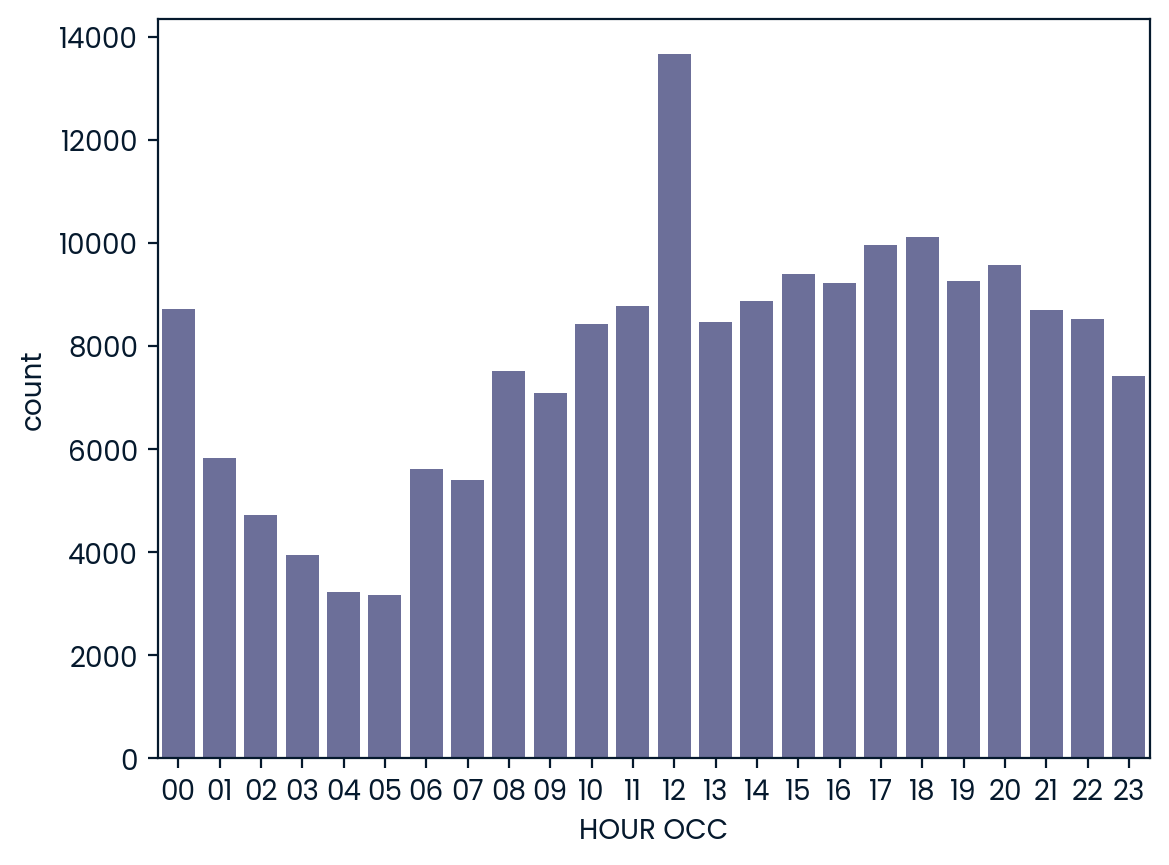

Central


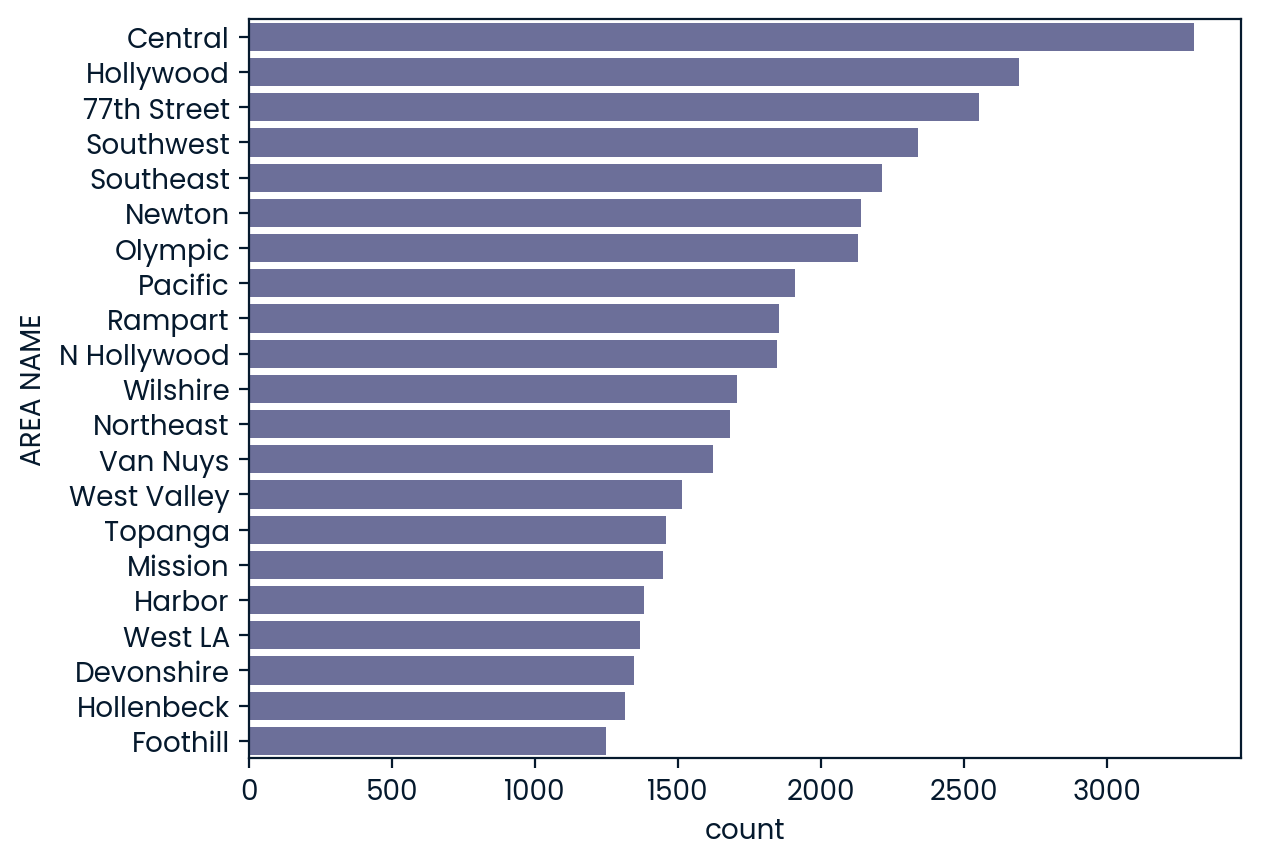

age_category
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: DR_NO, dtype: int64


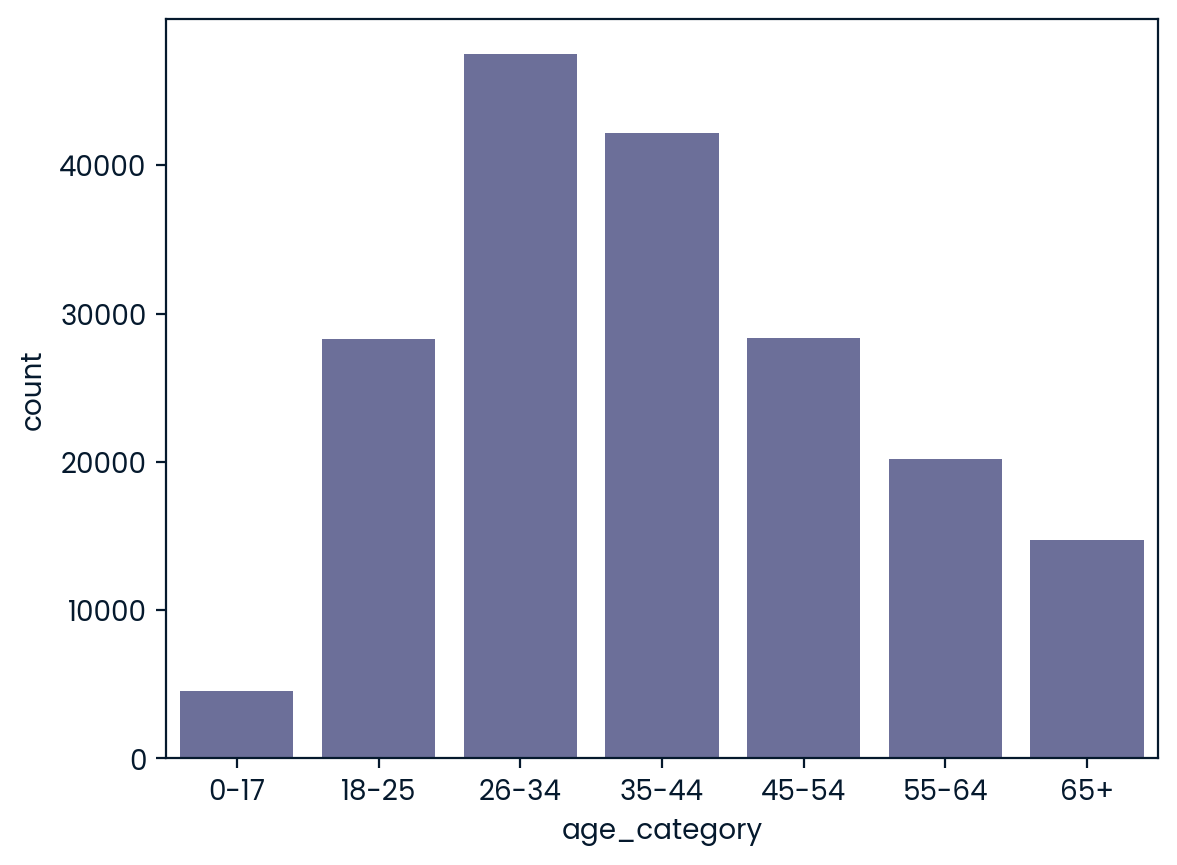

In [32]:
# Start coding here
# Use as many cells as you need
# Exploring the dataset further
print(crimes.dtypes)
print(crimes.isna().sum())
print(crimes.shape)

# Finding peak crime hour
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2]
peak_crime_hour_counts = crimes["HOUR OCC"].value_counts().reset_index()
peak_crime_hour = peak_crime_hour_counts.iloc[0,0]
peak_crime_hour = pd.to_numeric(peak_crime_hour)
print(peak_crime_hour)

# Distribution of crime frequency per hour
hour_order = order = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"] 
sns.countplot(x = "HOUR OCC", order = hour_order, data = crimes)
plt.show()

# Finding peak crime area
night_crimes = crimes[((crimes["TIME OCC"] >= "0000") & (crimes["TIME OCC"] < "0400" ))|((crimes["TIME OCC"] >= "2200") &(crimes["TIME OCC"] < "2359"))]
night_crimes_by_area = night_crimes.groupby("AREA NAME")["DR_NO"].size().sort_values(ascending = False).reset_index()
peak_night_crime_location = night_crimes_by_area.iloc[0,0]
print(str(peak_night_crime_location))

# Distribution of night crimes grouped by area
sns.countplot(y = "AREA NAME", order = night_crimes["AREA NAME"].value_counts().index, data = night_crimes)
plt.show()

## Number of crimes committed against victims within a category of age
# Create categories
age_categories = ["0-17","18-25", "26-34","35-44","45-54","55-64"]

# Assign variables
age_0_17 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
age_18_25 = [18,19,20,21,22,23,24,25]
age_26_34 = [26,27,28,29,30,31,32,33,34]
age_35_44 = [35,36,37,38,39,40,41,42,43,44]
age_45_54 = [45,46,47,48,49,50,51,52,53,54]
age_55_64 = [55,56,57,58,59,60,61,62,63,64]

# Set conditions
age_conditions = [(crimes["Vict Age"].isin(age_0_17)), (crimes["Vict Age"].isin(age_18_25)), (crimes["Vict Age"].isin(age_26_34)), (crimes["Vict Age"].isin(age_35_44)), (crimes["Vict Age"].isin(age_45_54)), (crimes["Vict Age"].isin(age_55_64))]

# Create column
crimes["age_category"] = np.select(age_conditions, age_categories, default = "65+")

# Check size grouped by new age_category column
victim_ages = crimes.groupby("age_category")["DR_NO"].size()
print(victim_ages)

# Distribution of crimes per age category
sns.countplot(x = "age_category", order =["0-17","18-25", "26-34","35-44","45-54","55-64", "65+"] , data = crimes)
plt.show()
